In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib widget
from matplotlib.ticker import FormatStrFormatter

In [40]:
plt.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "axes.titlesize": 16, 
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12
})

# Load Model Results and Family Dataset

In [2]:
ngb_df = pd.read_csv("NGBooster_result.csv")
ngb_df["pred_e"] = ngb_df["pred_e"] + ngb_df["e"]
ngb_df["pred_sini"] = ngb_df["pred_inc"] + np.sin(ngb_df['Incl.']*np.pi/180)

In [3]:
merged_df = pd.read_csv("merged_elements.csv")
merged_df_copy = merged_df
test_name_list = ngb_df["Des'n"].to_list()

ngb_subset = ngb_df[["Des'n", "pred_e", "error_e", "pred_inc", "error_inc", "pred_sini"]]
merged_df = pd.merge(merged_df, ngb_subset, on="Des'n", how="inner")

/var/folders/69/qyn6t8gs2d72s601sh3t50sc0000gn/T/ipykernel_84725/3248726607.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("merged_elements.csv")


In [4]:
propa = merged_df["propa"]
prope = merged_df["prope"]
propsini = merged_df["propsini"]

In [5]:
column_names = ['propa', 'prope', 'propsini', 'g', 's', 'H', 'NumOpps', 'PackedName', 'UnpackedName']
df_Velleda = pd.read_csv("inner_126_velleda_fam3.csv", header=None, names=column_names)
def convert_id(val):
	val_str = str(val)
	if val_str.isdigit():
		return int(val_str)
	return val_str

df_Velleda["PackedName"] = df_Velleda["PackedName"].apply(convert_id)
df_Velleda

,propa,prope,propsini,g,s,H,NumOpps,PackedName,UnpackedName
0,2.438860,0.072280,0.045947,40.851255,-42.703906,9.30,63,126,126
1,2.441824,0.074053,0.045585,40.951172,-42.878256,17.03,15,M1071,221071
2,2.435232,0.073062,0.046095,40.759361,-42.565716,17.12,14,T6086,296086
3,2.438780,0.072035,0.043792,40.879475,-42.708727,17.90,13,V6285,316285
4,2.440053,0.074322,0.044979,40.913560,-42.815681,17.79,10,c9945,389945
...,...,...,...,...,...,...,...,...,...
303,2.331699,0.076564,0.050382,37.299052,-38.392160,16.93,17,D6551,136551
304,2.344087,0.075571,0.052807,37.696171,-38.834860,18.74,9,K16G46V,2016GV46
305,2.347829,0.073877,0.051834,37.839790,-38.950176,18.38,8,K08D92B,2008DB92
306,2.350263,0.074166,0.050439,37.948371,-39.052874,15.93,19,36971,36971


In [6]:
name_list = df_Velleda["PackedName"]
family_df = merged_df_copy[merged_df_copy["Des'n"].isin(name_list)]
family_pred_df = ngb_df[ngb_df["Des'n"].isin(name_list)]
family_df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Des'n,H_x,G,Epoch,M,...,H_y,NumOpps,prope_h,propsini_h,g0,ecospo,esinpo,sinicosO,sinisinO,s0
125,125,125,125,125,125,126,9.30,0.15,K239D,255.14519,...,9.30,63,0.061099,0.025192,0.000032,0.060420,-0.009081,0.000404,0.000173,-0.000032
1357,1357,1357,1357,1357,1357,1394,11.80,0.15,K239D,304.76605,...,11.80,40,0.073578,0.024214,0.000032,0.027695,-0.068167,-0.000423,0.000009,-0.000032
3170,3170,3170,3170,3170,3170,3302,12.88,0.15,K239D,24.11047,...,12.88,31,0.071741,0.030575,0.000032,0.058544,-0.041466,-0.000481,0.000231,-0.000032
3898,3898,3898,3898,3898,3898,4081,12.97,0.15,K239D,9.03054,...,12.97,31,0.077251,0.013267,0.000030,0.043280,-0.063989,-0.000065,-0.000222,-0.000030
5738,5738,5738,5738,5738,5738,6054,14.02,0.15,K239D,332.28805,...,14.02,24,0.078647,0.017026,0.000031,0.058400,-0.052677,-0.000042,-0.000294,-0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221936,1221936,1221936,1221936,1221936,1221936,K22S33O,18.62,0.15,K239D,87.05225,...,18.62,1,0.055425,0.031384,0.000032,0.053569,0.014223,-0.000437,0.000330,-0.000032
1222081,1222081,1222081,1222081,1222081,1222081,K22S40V,19.05,0.15,K239D,48.56275,...,19.05,1,0.057844,0.017369,0.000032,0.037705,0.043867,0.000193,-0.000234,-0.000032
1227426,1227426,1227426,1227426,1227426,1227426,K22SS1D,19.20,0.15,K239D,130.22743,...,19.20,1,0.077492,0.027750,0.000030,0.064370,-0.043146,0.000460,0.000153,-0.000030
1236404,1236404,1236404,1236404,1236404,1236404,K23M05P,18.24,0.15,K239D,356.50486,...,18.24,10,0.073303,0.012789,0.000031,0.054715,-0.048781,0.000149,-0.000166,-0.000031


# Family Identification Evaluation

In [7]:
# Calculate the percentage of machine learning prediction still classifies asteroids into the family
family_pred_df = ngb_df[ngb_df["Des'n"].isin(name_list)]

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

In [8]:
# create a slab enclosing all family members
def slab_d_calc(family_df_copy, family_pred_df_copy, merged_df, command):
	if command == "osculating":
		columns_bound = {"a": "a", "e": "e", "sini": "Incl."}
		columns = {"a": "a", "e": "e", "sini": "Incl."}
	elif command == "proper":
		columns_bound = {"a": "propa", "e": "prope", "sini": "propsini"}
		columns = {"a": "propa", "e": "prope", "sini": "propsini"}
	elif command == "pred":
		columns_bound = {"a": "propa", "e": "prope", "sini": "propsini"}
		columns = {"a": "propa", "e": "pred_e", "sini": "pred_sini"}

	adds = 0

	a_adds = (family_df_copy[columns_bound["a"]].max() - family_df_copy[columns_bound["a"]].min())/2
	e_adds = (family_df_copy[columns_bound["e"]].max() - family_df_copy[columns_bound["e"]].min())/2
	sini_adds = (family_df_copy[columns_bound["sini"]].max() - family_df_copy[columns_bound["sini"]].min())/2

	a_adds = 0
	e_adds = 0
	sini_adds = 0

	a_min, a_max = family_df_copy[columns_bound["a"]].min() - a_adds, family_df_copy[columns_bound["a"]].max() + a_adds
	e_min, e_max = family_df_copy[columns_bound["e"]].min() - e_adds, family_df_copy[columns_bound["e"]].max() + e_adds
	sini_min, sini_max = family_df_copy[columns_bound["sini"]].min() - sini_adds, family_df_copy[columns_bound["sini"]].max() + sini_adds

	slab_df = merged_df[
		(merged_df[columns["a"]] >= a_min) & (merged_df[columns["a"]] <= a_max) &
		(merged_df[columns["e"]] >= e_min) & (merged_df[columns["e"]] <= e_max) &
		(merged_df[columns["sini"]] >= sini_min) & (merged_df[columns["sini"]] <= sini_max)
	]

	a_family, e_family, sini_family, names = family_df_copy[columns_bound["a"]].values, family_df_copy[columns_bound["e"]].values, family_df_copy[columns_bound["sini"]].values, family_df_copy["Des'n"].values

	d_results = []
	for idx, row in slab_df.iterrows():
		a = row[columns["a"]]
		e = row[columns["e"]]
		sini = row[columns["sini"]]
		name = row["Des'n"]
		
		for a_f, e_f, sini_f, name_f in zip(a_family, e_family, sini_family, names):
			if name == name_f:
				continue
			else:
				da = a_f - a
				de = e_f - e
				dsini = sini_f - sini
				d = calculate_d(a, da, de, dsini)
				d_results.append({
					"name_asteroid": name,
					"name_family_asteroid": name_f,
					"d": d
				})
	d_df = pd.DataFrame(d_results)

	return d_df

d_df_pred = slab_d_calc(family_df, family_pred_df, merged_df, "pred")
d_df_osc = slab_d_calc(family_df, family_pred_df, merged_df, "osculating")

In [9]:
# Number of family members included in ths slab
d_df_single = d_df_pred.drop_duplicates(subset = ["name_asteroid"])
num_family_slab = len(d_df_single[d_df_single["name_asteroid"].isin(name_list)])
print(f"Number of family members included in the slab: {num_family_slab}")

Number of family members included in the slab: 31


In [10]:
num_family_detected = d_df_pred[d_df_pred["d"] < 70].drop_duplicates(subset = ["name_asteroid"])
print(f"Number of family members within literature cutoff: {len(num_family_detected)}")

Number of family members within literature cutoff: 30


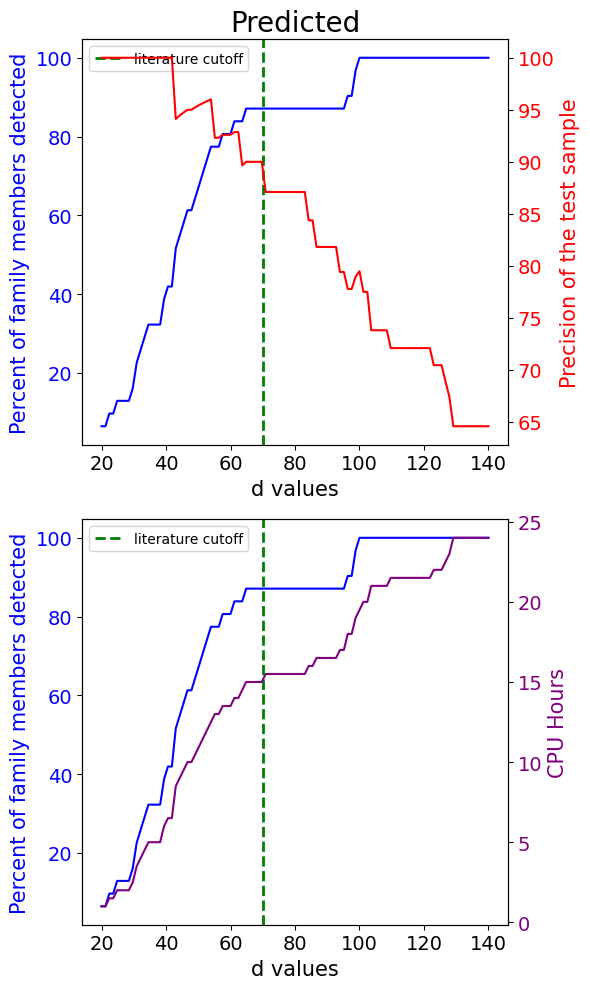

In [11]:
d_values = np.linspace(20, 140, 100)
percent_detected = []
cpu_hours = []
purity = []
d_published = 70

for d in d_values:
	filtered_df = d_df_pred[d_df_pred["d"] < d]
	filtered_df = filtered_df.drop_duplicates(subset = ["name_asteroid"])
	family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
	cpu_hours.append(len(filtered_df) * 0.5)
	percent_detected.append(len(family_slab_df)/num_family_slab * 100)
	purity.append((len(family_slab_df)/(len(filtered_df))) * 100)

# percent_detected = np.array(percent_detected)
# stop_idx = np.argmax(percent_detected >= 100) + 1

# # Slice all arrays up to stop_idx
# d_values = d_values[:stop_idx]
# percent_detected = percent_detected[:stop_idx]
# cpu_hours = cpu_hours[:stop_idx]
# purity = purity[:stop_idx]

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(6, 10))

ax1.plot(d_values, percent_detected, color='blue')
ax1.set_xlabel('d values', size=15)
ax1.set_ylabel('Percent of family members detected', color='blue', size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax1.axvline(x=d_published, color='green', label = "literature cutoff", linestyle='--', linewidth=2)
ax1.set_title("Predicted", size = 20)
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(d_values, purity, color='red', label='Purity')
ax2.set_ylabel('Precision of the test sample', color='red', size=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

ax3.plot(d_values, percent_detected, color='blue')
ax3.set_xlabel('d values', size=15)
ax3.set_ylabel('Percent of family members detected', color='blue', size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax3.axvline(x=d_published, color='green', linestyle='--', linewidth=2, label = "literature cutoff")
ax3.legend()

ax4 = ax3.twinx()
ax4.plot(d_values, cpu_hours, color='purple', label='CPU Hours')
ax4.set_ylabel('CPU Hours', color='purple', size=15)
ax4.tick_params(axis='y', labelcolor='purple', labelsize=14)

fig.tight_layout()
plt.show()

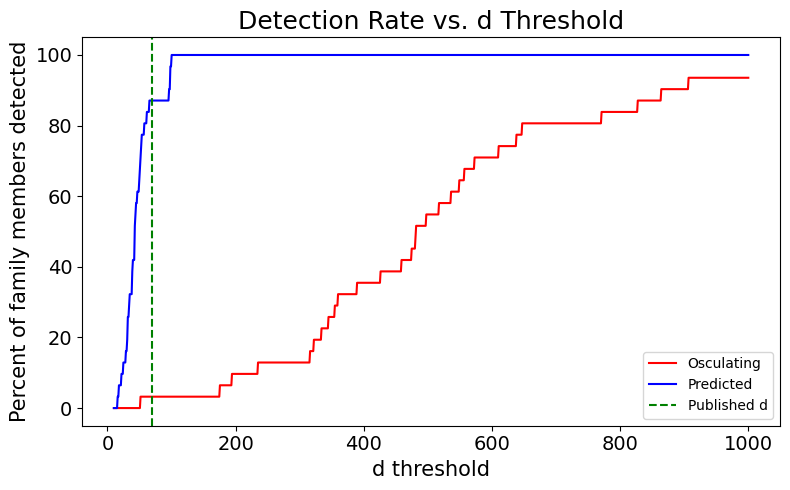

In [12]:
d_values = np.linspace(10, 1000, 1000)

percent_detected_by_source = {
	"Osculating": [],
	"Predicted": []
}

for label, d_df in zip(["Osculating", "Predicted"], [d_df_osc, d_df_pred]):
	for d in d_values:
		filtered_df = d_df[d_df["d"] < d]
		filtered_df = filtered_df.drop_duplicates(subset=["name_asteroid"])
		family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
		percent = len(family_slab_df) / num_family_slab * 100
		percent_detected_by_source[label].append(percent)

plt.figure(figsize=(8, 5))
plt.plot(d_values, percent_detected_by_source["Osculating"], label="Osculating", color="red")
plt.plot(d_values, percent_detected_by_source["Predicted"], label="Predicted", color="blue")
plt.axvline(d_published, color="green", linestyle="--", label="Published d")

plt.xlabel("d threshold", fontsize=15)
plt.ylabel("Percent of family members detected", fontsize=15)
plt.title("Detection Rate vs. d Threshold", fontsize=18)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
d = 50
filtered_df = d_df[d_df["d"] < d]
filtered_df = filtered_df.drop_duplicates(subset = ["name_asteroid"])
family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
print(f"Percentage of family members detected: {len(family_slab_df)/num_family_slab * 100}")
print(f"Purity of the sample: {len(family_slab_df)/(len(filtered_df)) * 100}")

Percentage of family members detected: 64.51612903225806
Purity of the sample: 95.23809523809523


# 2D plot generation

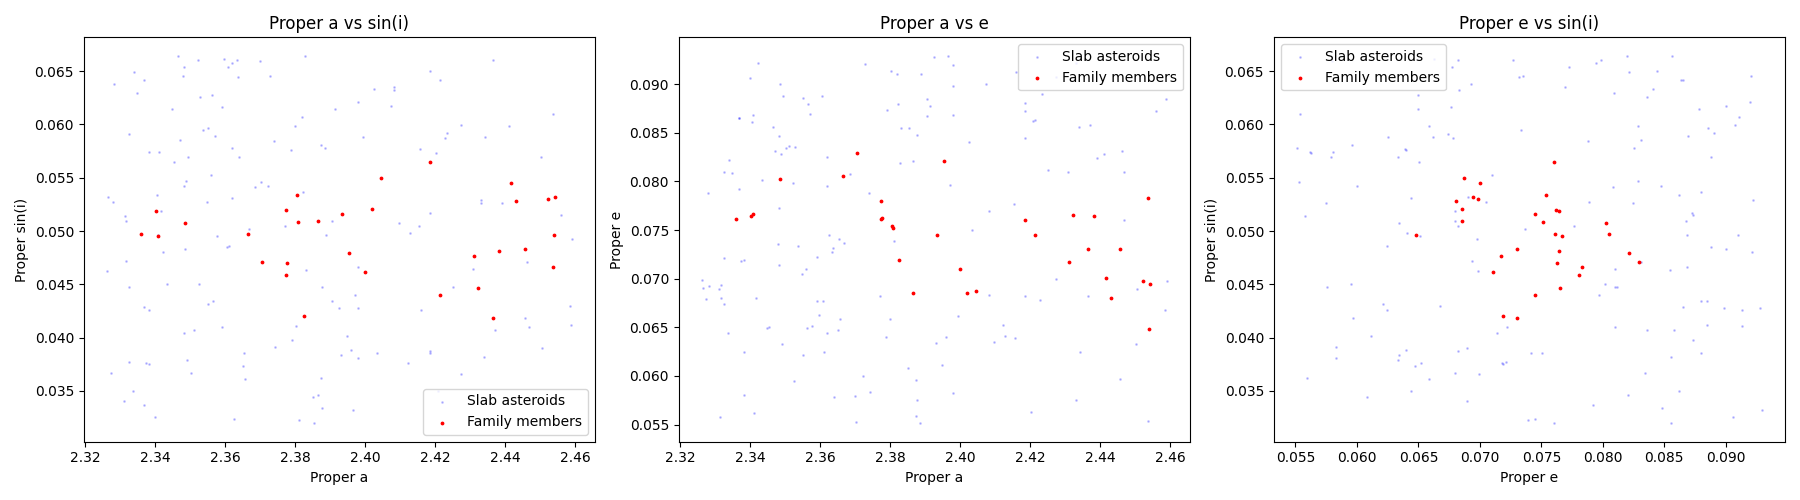

In [19]:
# Identify family members
family_test_df = family_df[family_df["Des'n"].isin(test_name_list)]

# Define slab thresholds
threshold_e = 0.01
threshold_i = 0.01
threshold_a = 0.01

# Filter slab using proper elements
filter = (
    (propa < np.max(family_test_df["propa"]) + threshold_a) & (propa > np.min(family_test_df["propa"]) - threshold_a) &
    (prope < np.max(family_test_df["prope"]) + threshold_e) & (prope > np.min(family_test_df["prope"]) - threshold_e) &
    (propsini < np.max(family_test_df["propsini"]) + threshold_i) & (propsini > np.min(family_test_df["propsini"]) - threshold_i)
)
filtered = merged_df[filter]
filtered = filtered[(filtered["Des'n"].isin(test_name_list)) & (~filtered["Des'n"].isin(name_list))]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# propa vs propsini
axes[0].scatter(filtered["propa"], filtered["propsini"], s=1, alpha=0.2, label="Slab asteroids", color='blue')
axes[0].scatter(family_test_df["propa"], family_test_df["propsini"], s=3, label="Family members", color='red')
axes[0].set_xlabel("Proper a")
axes[0].set_ylabel("Proper sin(i)")
axes[0].legend()
axes[0].set_title("Proper a vs sin(i)")

# propa vs prope
axes[1].scatter(filtered["propa"], filtered["prope"], s=1, alpha=0.2, label="Slab asteroids", color='blue')
axes[1].scatter(family_test_df["propa"], family_test_df["prope"], s=3, label="Family members", color='red')
axes[1].set_xlabel("Proper a")
axes[1].set_ylabel("Proper e")
axes[1].legend()
axes[1].set_title("Proper a vs e")

# prope vs propsini
axes[2].scatter(filtered["prope"], filtered["propsini"], s=1, alpha=0.2, label="Slab asteroids", color='blue')
axes[2].scatter(family_test_df["prope"], family_test_df["propsini"], s=3, label="Family members", color='red')
axes[2].set_xlabel("Proper e")
axes[2].set_ylabel("Proper sin(i)")
axes[2].legend()
axes[2].set_title("Proper e vs sin(i)")

plt.tight_layout()
plt.show()


# 3D plot generation

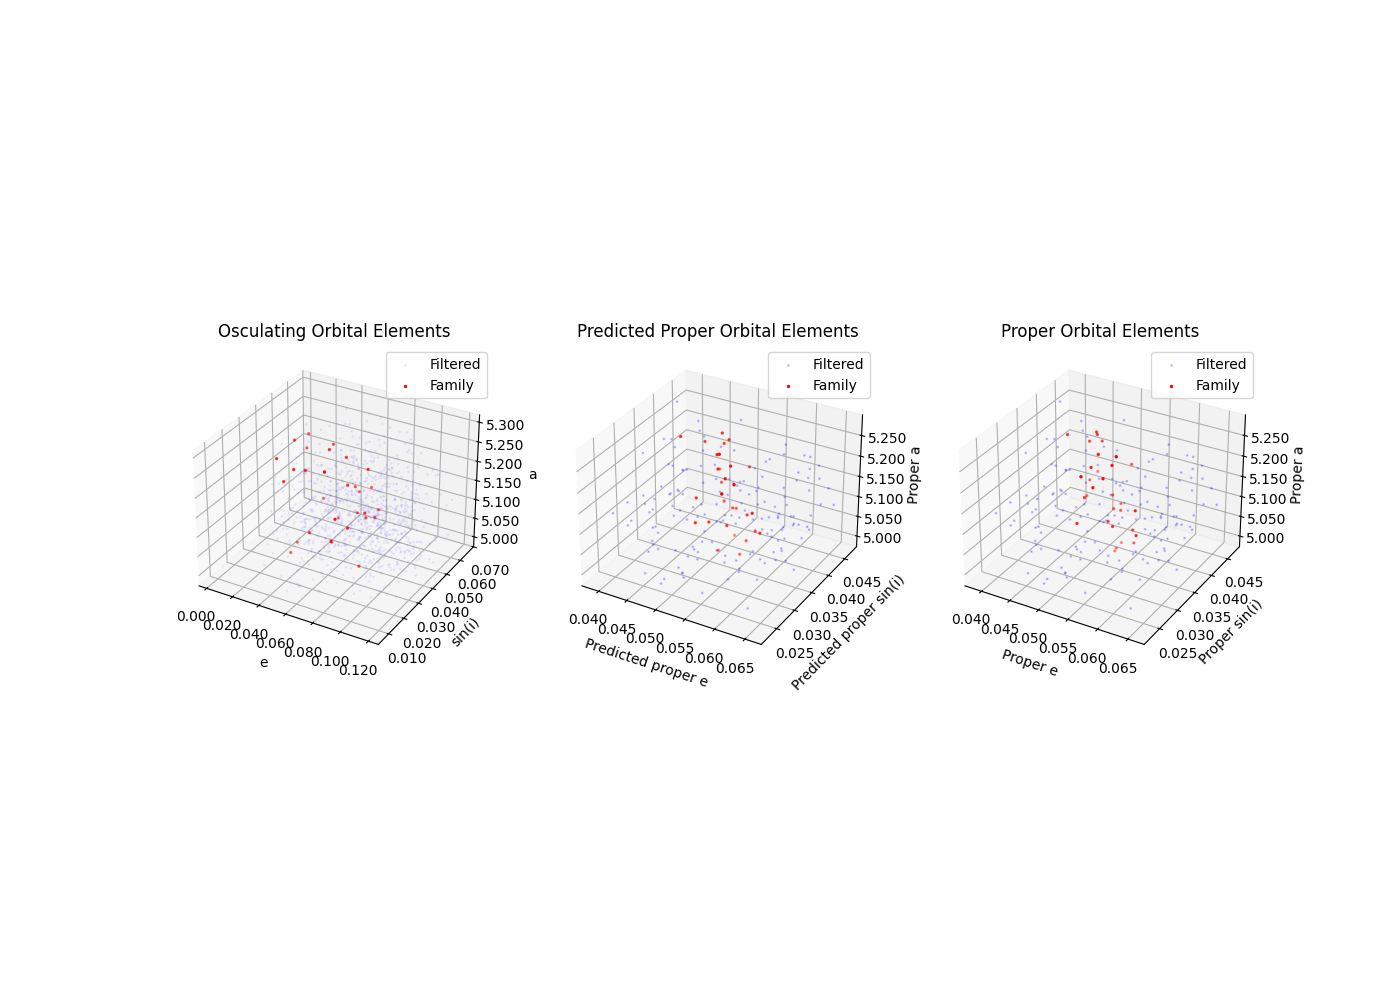

In [ ]:
formatter = FormatStrFormatter('%.3f')
family_test_df = family_df[family_df["Des'n"].isin(test_name_list)]
threshold_e = 0.01
threshold_i = 0.01
threshold_a = 0.01
filter = (propa < np.max(family_test_df["propa"]) + threshold_a) & (propa > np.min(family_test_df["propa"]) - threshold_a) &\
 (prope < np.max(family_test_df["prope"]) + threshold_e) & (prope > np.min(family_test_df["prope"])- threshold_e) &\
 (propsini < np.max(family_test_df["propsini"]) + threshold_i) & (propsini > np.min(family_test_df["propsini"])- threshold_i)
filtered = merged_df[filter]
filtered = filtered[(filtered["Des'n"].isin(test_name_list)) & (~filtered["Des'n"].isin(name_list))]
fig = plt.figure(figsize=(14, 10))

threshold_e = 0.01
threshold_i = 0.01
threshold_a = 0.01
filter_osc = (propa < np.max(family_test_df["a"]) + threshold_a) & (propa > np.min(family_test_df["a"]) - threshold_a) &\
 (prope < np.max(family_test_df["e"]) + threshold_e) & (prope > np.min(family_test_df["e"])- threshold_e) &\
 (propsini < np.max(np.sin(family_test_df["Incl."] * np.pi/180)) + threshold_i) & (propsini > np.min(np.sin(family_test_df["Incl."] * np.pi/180)) - threshold_i)
filtered_osc = merged_df[filter_osc]
filtered_osc = filtered_osc[(filtered_osc["Des'n"].isin(test_name_list)) & (~filtered_osc["Des'n"].isin(name_list))]

ax2 = fig.add_subplot(1, 3, 1, projection='3d')
ax2.scatter(filtered_osc["e"] / np.sqrt(2), np.sin(filtered_osc["Incl."]*np.pi/180) / np.sqrt(2), filtered_osc["a"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.05, label="Filtered")
ax2.scatter(family_test_df["e"] / np.sqrt(2), np.sin(family_test_df["Incl."] * np.pi/180) / np.sqrt(2), family_test_df["a"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax2.set_xlabel("e")
ax2.set_ylabel("sin(i)")
ax2.set_zlabel("a")
# ax2.set_xlim()
ax2.set_title("Osculating Orbital Elements")
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.zaxis.set_major_formatter(formatter)
ax2.legend()

ax3 = fig.add_subplot(1, 3, 2, projection='3d')
ax3.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax3.scatter((family_pred_df["pred_e"]) / np.sqrt(2), 
			(family_pred_df["pred_sini"])/ np.sqrt(2), 
			family_pred_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax3.set_xlabel("Predicted proper e")
ax3.set_ylabel("Predicted proper sin(i)")
ax3.set_zlabel("Proper a")
ax3.set_title("Predicted Proper Orbital Elements")
ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax3.zaxis.set_major_formatter(formatter)
ax3.legend()

ax1 = fig.add_subplot(1, 3, 3, projection='3d')
ax1.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax1.scatter(family_test_df["prope"] / np.sqrt(2), family_test_df["propsini"] / np.sqrt(2), family_test_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax1.set_xlabel("Proper e")
ax1.set_ylabel("Proper sin(i)")
ax1.set_zlabel("Proper a")
ax1.set_title("Proper Orbital Elements")
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
ax1.zaxis.set_major_formatter(formatter)
ax1.legend()